try out classic methods with opencv

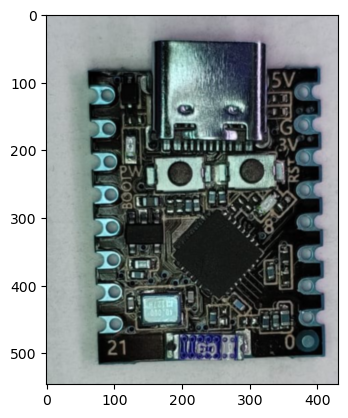

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test3.jpg') 
plt.imshow(img, cmap='gray', interpolation='bicubic')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

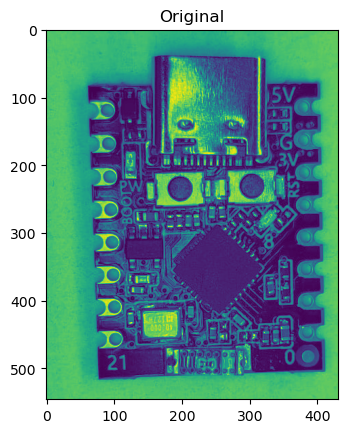

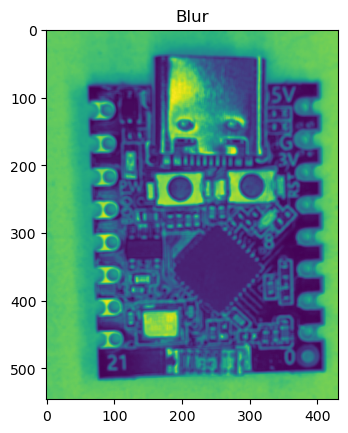

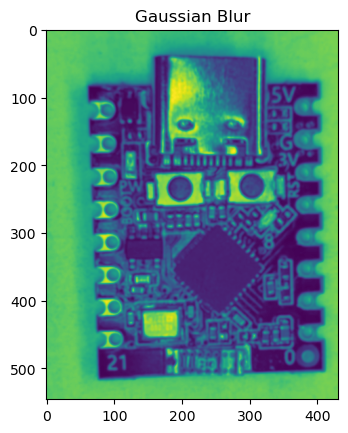

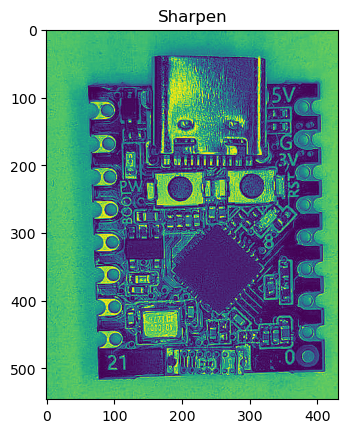

In [26]:
# I dont think blurring helps here
plt.imshow(img)
plt.title("Original")
plt.show()

blur = cv2.blur(img, (5, 5))
plt.imshow(blur) 
plt.title("Blur")
plt.show()

gauss_blurred = cv2.GaussianBlur(img, (7, 7), 0)  # Kernelgröße anpassen
plt.imshow(gauss_blurred)
plt.title("Gaussian Blur")
plt.show()  

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpen = cv2.filter2D(img, -10, kernel)

plt.imshow(sharpen)
plt.title("Sharpen")
plt.show()


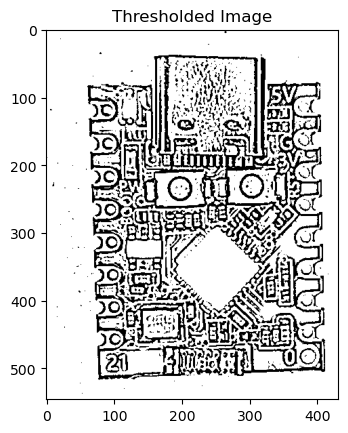

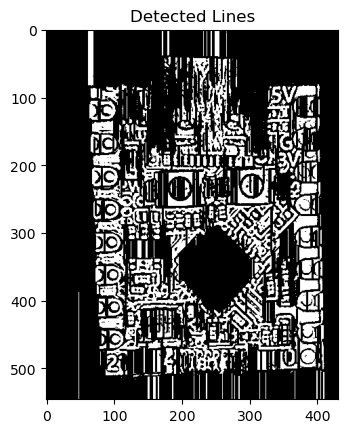

In [77]:
threshholded = cv2.adaptiveThreshold(gauss_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)  

plt.imshow(threshholded, cmap='gray')
plt.title('Thresholded Image')  
plt.show()

lines = cv2.HoughLinesP(threshholded, rho=1, theta=1, threshold=200, minLineLength=20, maxLineGap=1)

# Linien zeichnen
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(threshholded, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(threshholded, cmap='gray')
plt.title('Detected Lines')
plt.show()


